In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import scipy.stats
import math
from sklearn.metrics import accuracy_score 

In [2]:
train_X = np.loadtxt('G:\data_500.csv',dtype=np.double,delimiter=',').T
train_Y = np.loadtxt('G:\label_500.csv', dtype=np.int, delimiter=',')
train_Y[train_Y==3] = 0
test_X = np.loadtxt('G:\dtest_data.csv', dtype=np.double, delimiter=',').T
test_Y = np.loadtxt('G:\dtest_label.csv', dtype=np.int, delimiter=',')
test_Y[test_Y==3] = 0

In [3]:
x_train = train_X
L_train = train_Y
x_test = test_X
L_test = test_Y

In [4]:
K = 10
N_train = 500
N_test = 10000
C = 3

In [5]:
for n in range(0, N_train):
    L_train_R= np.zeros((N_train,C))
for n in range(0, N_train):
    L_train_R[n,L_train[n]]= 1
print(L_train_R)

for n in range(0, N_test):
    L_test_R= np.zeros((N_test,C))
for n in range(0, N_test):
    L_test_R[n,L_test[n]]= 1
print(L_test_R)

[[0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 ...
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]]
[[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 ...
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]]


<Figure size 720x720 with 0 Axes>

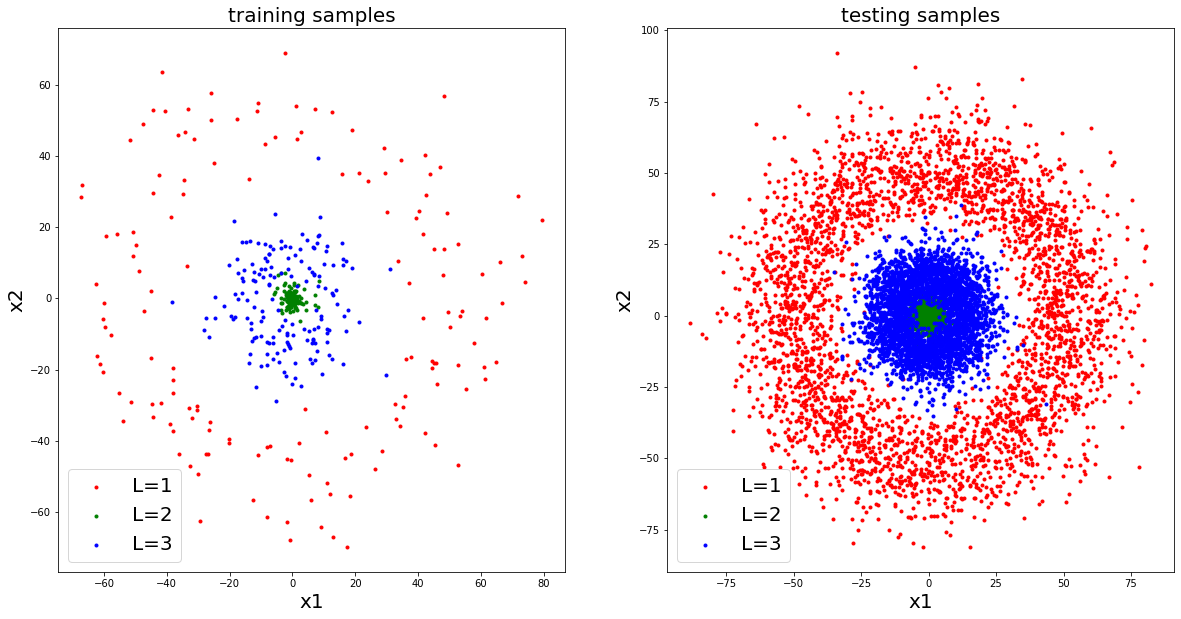

<Figure size 720x720 with 0 Axes>

In [6]:
#show data
colors=['r','g','b']
labels = ['L=1','L=2','L=3']
plt.figure(figsize=(20,10))
plt.subplot(121)
for i in range(C):
    plt.scatter(x_train[np.where(L_train == i),0],x_train[np.where(L_train == i),1],marker='.', c=colors[i], label= labels[i])
plt.title('training samples',fontsize=20)
plt.legend(fontsize=20)
plt.xlabel('x1',fontsize=20)
plt.ylabel('x2',fontsize=20)
plt.subplot(122)
for i in range(C):
    plt.scatter(x_test[np.where(L_test == i),0],x_test[np.where(L_test == i),1],marker='.', c=colors[i], label= labels[i])
plt.title('testing samples',fontsize=20)
plt.legend(fontsize=20)
plt.xlabel('x1',fontsize=20)
plt.ylabel('x2',fontsize=20)
plt.figure(figsize=(10, 10))

In [7]:
#find the best model

fold_mark = np.ceil(np.linspace(0, N_train, K + 1))
index_partition_limit = np.zeros([K, 2])
for k in range(K):
    index_partition_limit[k, 0] = fold_mark[k]
    index_partition_limit[k, 1] = fold_mark[k + 1] - 1


In [8]:
act_list = np.array(['relu', 'sigmoid'])
node_list = np.array([1,2,3,4,5,6])
mse_mean = np.zeros((2, len(node_list)))
A = np.zeros((6,2))
A1 = np.ones((6,2))
A2 = np.ones((6,2))

In [9]:
for j in range(len(act_list)):
    act = act_list[j]
    for i in range(len(node_list)):
        node = node_list[i]
        mse = np.zeros((K))
        current_acc_list = []
        Sum = 0
        Accuacy = 0
        for k in range(K):
            ind_validate = np.arange(index_partition_limit[k, 0], index_partition_limit[k, 1] + 1)
            ind_validate = ind_validate.astype(int)
            x_validate = x_train[ind_validate, :]  #1
            ind_train_k = np.hstack((np.arange(0, index_partition_limit[k, 0]), np.arange(index_partition_limit[k, 1] + 1, N_train)))  #9
            
            ind_train_k = ind_train_k.astype(int)
            x_train_k = x_train[ind_train_k, :]
            
            # formulate the MLP model and choose activation function
            model = tf.keras.models.Sequential([tf.keras.layers.Dense(node, activation=act), tf.keras.layers.Dense(C, activation='softmax')])
            optimizer1= tf.keras.optimizers.Adam(learning_rate=1e-1)
            model.compile(optimizer=optimizer1, loss='categorical_crossentropy', metrics=['accuracy'])
            model.fit(x_train_k, L_train_R[ind_train_k], epochs=50, verbose=0)  # verbos=1,0
            model.compile(optimizer='RMSprop', loss='mse', metrics=['accuracy'])
            model.fit(x_train_k, L_train_R[ind_train_k], epochs=10, verbose=0)  # verbos=1,0
            L_pre_P = model.predict(x_validate)
            L_pre = np.argmax(L_pre_P,axis=1)
            Accuacy = accuracy_score(L_train[ind_validate],L_pre)
            Sum = Sum + Accuacy 
        A[i,j] = Sum/K



In [10]:
A2 = A1 - A
print(A)
print(A1)
print(A2)
print(L_pre)
#print(x_validate)
print(L_train[ind_validate])
#print(indice1)

[[0.556 0.494]
 [0.796 0.63 ]
 [0.94  0.728]
 [0.952 0.808]
 [0.954 0.888]
 [0.958 0.904]]
[[1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]]
[[0.444 0.506]
 [0.204 0.37 ]
 [0.06  0.272]
 [0.048 0.192]
 [0.046 0.112]
 [0.042 0.096]]
[2 2 2 1 1 0 0 2 1 2 1 2 2 0 2 1 2 1 1 1 1 1 1 1 1 1 1 0 0 2 1 1 1 0 0 2 1
 2 2 0 1 1 0 1 0 2 0 2 2 1]
[2 2 2 1 1 0 0 1 1 1 1 2 2 0 2 1 2 1 1 1 1 1 1 1 1 1 1 0 0 2 1 1 1 0 0 2 1
 1 2 0 1 1 2 1 0 2 0 2 2 1]


In [16]:
node_best = np.array(node_list)[5]
act_best = np.array(act_list)[0]

6
relu


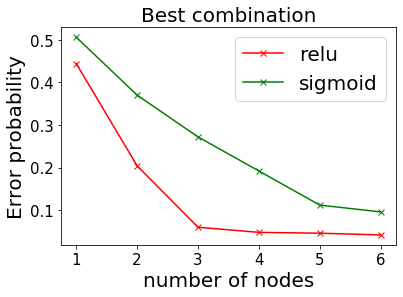

In [17]:
#para found
for j in range(len(act_list)):
    plt.plot(node_list, A2[:,j], marker='x', c=colors[j], label=act_list[j])
plt.title('Best combination', fontsize=20)
plt.xlabel('number of nodes', fontsize=20)
plt.ylabel('Error probability', fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(fontsize=20)
print(node_best)
print(act_best)

In [18]:
model1 = tf.keras.models.Sequential([tf.keras.layers.Dense(node_best, activation=act_best),tf.keras.layers.Dense(C, activation='softmax')])
optimizer1= tf.keras.optimizers.Adam(learning_rate=1e-1)
model1.compile(optimizer1,loss='categorical_crossentropy',metrics=['accuracy'])
model1.fit(x_train,L_train_R,epochs=50,verbose=0)
model1.compile(optimizer='RMSprop',loss='mse',metrics=['accuracy'])
model1.fit(x_train,L_train_R,epochs=10,verbose=0)
L_pre_P = model.predict(x_test)
L_pre = np.argmax(L_pre_P,axis=1)
print(1-accuracy_score(L_test,L_pre))

0.04290000000000005
